In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import norm
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
## Sætter grænseværdien for animationsstørrelsen op##
matplotlib.rcParams['animation.embed_limit'] = 2**128

## Dobbeltpendul uden småvinkel app.

Dobbeltpendulet bestående af 2 penduler med længderne $l_1,l_2$ og masserne $m_1,m_2$, har:

\begin{equation}
T=\frac{m_1+m_2}{2}{L_1}^2\dot{\phi_1}^2+m_2L_1L_2\dot{\phi_1}\dot{\phi_2}cos(\phi_1-\phi_2)+\frac{m_2}{2}{L_2}^2\dot{\phi_2}^2
\end{equation}
og:

\begin{equation}
U=(m_1+m_2)gL_1(1-cos(\phi_1))+m_2gL_2(1-cos(\phi_2))
\end{equation}
Således at Lagrangefunktionen bliver:

\begin{equation}
\mathcal{L}(\phi_1,\phi_2,\dot{\phi_1},\dot{\phi_2})=\frac{m_1+m_2}{2}{L_1}^2\dot{\phi_1}^2+m_2L_1L_2\dot{\phi_1}\dot{\phi_2}cos(\phi_1-\phi_2)+\frac{m_2}{2}{L_2}^2\dot{\phi_2}^2-(m_1+m_2)gL_1(1-cos(\phi_1))-m_2gL_2(1-cos(\phi_2))
\end{equation}

og de 2 Euler-Lagrange bevægelsesligninger:

\begin{align}
\frac{\partial\mathcal{L}}{\partial\phi_1}&=\frac{d}{dt}\bigg(\frac{\partial\mathcal{L}}{\partial \dot{\phi_1}}\bigg)\\
\frac{\partial\mathcal{L}}{\partial\phi_2}&=\frac{d}{dt}\bigg(\frac{\partial\mathcal{L}}{\partial \dot{\phi_2}}\bigg)\\
\end{align}
bliver altså:

\begin{align}
(m_1+m_2)\ddot{\phi_1}L_1+m_2L_2\ddot{\phi_2}cos(\phi_1-\phi_2)-m_2L_2\dot{\phi_2}sin(\phi_1-\phi_2)(\dot{\phi_1}-\dot{\phi_2})
&=-m_2L_2\dot{\phi_1}\dot{\phi_2}sin(\phi_1-\phi_2)-(m_1+m_2)sin(\phi_1)g\\
m_2L_2\ddot{\phi_2}+m_2L_1\ddot{\phi_1}cos(\phi_1-\phi_2)-m_2L_1\dot{\phi_1}sin(\phi_1-\phi_2)(\dot{\phi_1}-\dot{\phi_2})&=m_2L_1\dot{\phi_2}\dot{\phi_1}sin(\phi_1-\phi_2)-m_2gsin(\phi_2)\\
\end{align}

Som ved substitution og omskrivning kan stilles på formen:
\begin{align}
\ddot{\phi_1}&=\frac{-1}{L_1(m_1+m_2sin(\phi_1-\phi_2)^2)}\bigg(g\Big(m_1sin(\phi_1)-m_2\big(cos(\phi_1-\phi_2)sin(\phi_2)-sin(\phi_1)\big)\Big)+\Big(L_1cos(\phi_1-\phi_2)\dot{\phi_1}^2+L_2\dot{\phi_2}^2\Big)m_2sin(\phi_1-\phi_2)\bigg)\\
\ddot{\phi_2}&=\frac{1}{L_1(m_1+m_2sin(\phi_1-\phi_2)^2)}\bigg(g(m_1+m_2)\big(sin(\phi_1)cos(\phi_1-\phi_2)-sin(\phi_2)\big)+\big(L_1(m_1+m_2)\dot{\phi_1}^2+L_2m_2cos(\phi_1-\phi_2)\dot{\phi_2}^2\big)sin(\phi_1-\phi_2)\bigg)
\end{align}


In [2]:
m1 = 1
m2 = 2
l1 = 1
l2 = 1
g = 9.82 

tinit = 0
tfinal = 5
trange = [tinit,tfinal]

##startbetingelser
phi1_0 = np.pi/2
phi1_prik_0 = 0
phi2_0 = np.pi
phi2_prik_0 = 0

yinit = [phi1_0,phi1_prik_0,phi2_0,phi2_prik_0]
ts = np.linspace(tinit, tfinal, 1000)

def dydt(t,y):
    
    phi1 = y[0]
    phi1_prik = y[1]
    phi2 = y[2]
    phi2_prik = y[3]
    
    c1, c2 = phi1_prik, phi2_prik
    c3, c4 = np.sin(phi1-phi2), np.cos(phi1-phi2)
    c5, c6, c7, c8 = np.sin(phi1), np.sin(phi2), np.cos(phi1), np.cos(phi2)
    
    k1 = (-1/(l1*(m1+m2*c3**2))) 
    k2 = (g*(m1*c5-m2*(c4*c6-c5))+(l1*c4*c1**2+l2*c2**2)*m2*c3)
    d_phi1_prik_dt = k1*k2
    
    k3 = (1/(l1*(m1+m2*c3**2))) 
    k4 = (g*(m1+m2)*(c5*c4-c6)+(l1*(m1+m2)*c1**2+l2*m2*c4*c2**2)*c3)
    d_phi2_prik_dt = k3*k4
    
    return [c1,d_phi1_prik_dt,c2,d_phi2_prik_dt]

mysol = solve_ivp(dydt, trange, yinit, t_eval = ts, rtol = 3e-14)

ts = mysol.t
phi1 = mysol.y[0]
phi1_prik = mysol.y[1]
phi2 = mysol.y[2]
phi2_prik = mysol.y[3]

## Plotter bevægelse & state-space

Text(0, 0.5, '$\\phi_2$')

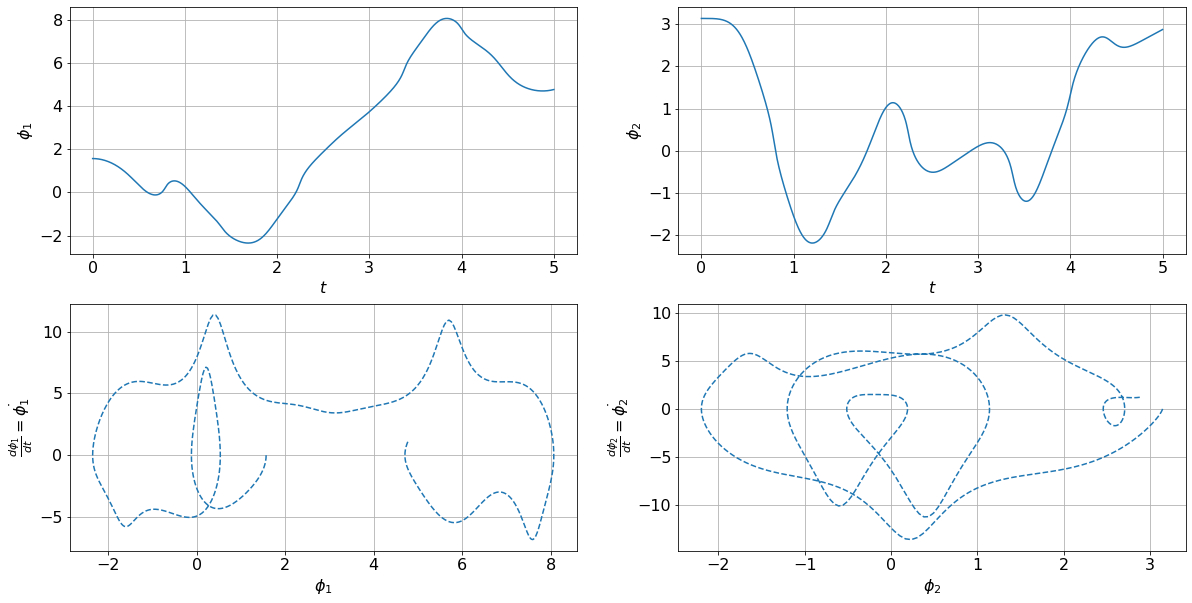

In [3]:
plt.rc('font', size=16)
fig,ax = plt.subplots(2,2,figsize=(20,10))
ax[1][0].plot(phi1,phi1_prik,linestyle='--')
ax[1][1].plot(phi2,phi2_prik,linestyle='--')

ax[0][0].plot(ts,phi1)
ax[0][1].plot(ts,phi2)

ax[1][0].grid()
ax[1][1].grid()
ax[0][0].grid()
ax[0][1].grid()

ax[1][0].set_xlabel('$\phi_1$')
ax[1][0].set_ylabel(r'$\frac{d\phi_1}{dt}=\dot{\phi_1}$')
ax[1][1].set_xlabel('$\phi_2$')
ax[1][1].set_ylabel(r'$\frac{d\phi_2}{dt}=\dot{\phi_2}$')


ax[0][0].set_xlabel('$t$')
ax[0][0].set_ylabel(r'$\phi_1$')
ax[0][1].set_xlabel('$t$')
ax[0][1].set_ylabel(r'$\phi_2$')


## Animerer

In [ ]:
def angle_to_cartesian1(angle,l1):
    x = np.sin(angle)*l1
    y = -np.cos(angle)*l1
    return [x,y]

def angle_to_cartesian2(angle1,angle2,l1,l2):
    x = np.sin(angle1)*l1+np.sin(angle2)*l2
    y = -(np.cos(angle1)*l1+np.cos(angle2)*l2)
    return [x,y]

xs1 = angle_to_cartesian1(phi1,l1)[0].tolist()
ys1 = angle_to_cartesian1(phi1,l1)[1].tolist()

xs2 = angle_to_cartesian2(phi1,phi2,l1,l2)[0].tolist()
ys2 = angle_to_cartesian2(phi1,phi2,l1,l2)[1].tolist()

fig, ax = plt.subplots(figsize=(8, 8))
dot1, = ax.plot([],[],'ro',ms=8)
line1, = ax.plot([],[],color='black')
dot2, = ax.plot([],[],'ro',ms=8)
line2, = ax.plot([],[],color='black')
tracer, = ax.plot([],[],linewidth = 1, color='green')


def update(i):
    dot1.set_data(xs1[i],ys1[i])
    line1.set_data([0,xs1[i]],[0,ys1[i]])
    dot2.set_data(xs2[i],ys2[i])
    line2.set_data([xs1[i],xs2[i]],[ys1[i],ys2[i]])
    tracer.set_data(xs2[0:i+1],ys2[0:i+1])

    return line1, dot1, line2, dot2, tracer

ax.plot(0,0,'bo', ms = 4)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
anim = animation.FuncAnimation(fig,
                               update,
                               frames=len(ts),
                               interval=1,
                               blit=True,
                               repeat_delay=0)
anim

# Tjekker energibevarelse

In [ ]:
def total_energy(v1,v2,d_v1_dt,d_v2_dt,mass1,mass2,length1,length2,grav_const):
    T = ((mass1+mass2)/2)*length1**2*d_v1_dt**2+mass2*length1*length2*d_v1_dt*d_v2_dt*np.cos(v1-v2)+(mass2/2)*length2**2*d_v2_dt**2
    U = (mass1+mass2)*grav_const*length1*(1-np.cos(v1))+mass2*grav_const*length2*(1-np.cos(v2))
    E_tot = T+U
    return T,U,E_tot

T = total_energy(phi1,phi2,phi1_prik,phi2_prik,m1,m2,l1,l2,g)[0]
U = total_energy(phi1,phi2,phi1_prik,phi2_prik,m1,m2,l1,l2,g)[1]
E_tot = total_energy(phi1,phi2,phi1_prik,phi2_prik,m1,m2,l1,l2,g)[2]

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(ts,T,color='red',label='Kinetisk energi',linestyle='--')
ax.plot(ts,U,color='black',label='potentiel energi',linestyle='--')
ax.plot(ts,E_tot,label=r'$E_{tot}=T+U$',linestyle='--')
ax.hlines(0,ts[0],ts[-1]),ax.grid(), ax.legend(), ax.set_xlim(ts[0],ts[-1])
